### 获得前N个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))  #X有两个特征
X[:,0] = np.random.uniform(0.,100.,size = 100) 
X[:,1] = 0.75 * X[:,0] + 3.+ np.random.normal(0,10,size = 100)

In [3]:
def demean(X):
    return X - np.mean(X,axis = 0)
X = demean(X)

<function matplotlib.pyplot.show(*args, **kw)>

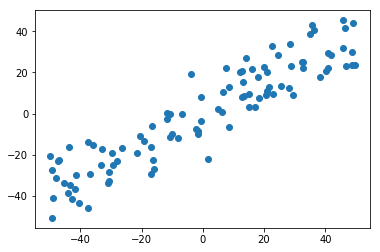

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show

In [21]:
def f(w,X):
    return np.sum((X.dot(w) ** 2)) / len(X)

def df(w,x):
    return X.T.dot(X.dot(w)) *2./len(X)

def direction(w):  #把w转化为单位向量
    return w / np.linalg.norm(w)
    
def frist_component(X,initial_w,eta,n_iters=1e4,epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter <n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,X) - f(last_w,X)) <epsilon):
            break
        cur_iter += 1
    return w

In [22]:
initial_w = np.random.random(X.shape[1])

In [23]:
eta = 0.01

In [24]:
w =  frist_component(X,initial_w,eta)

In [25]:
w

array([0.78638009, 0.61774296])

In [26]:
X2 =np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

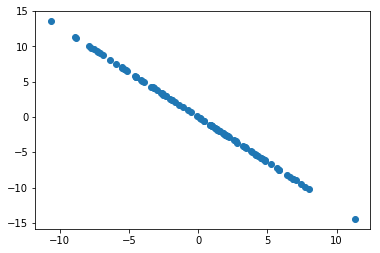

In [27]:
plt.scatter(X2[:,0],X2[:,1])

In [28]:
w2 = frist_component(X2,initial_w,eta)

In [29]:
w2

array([0.78638009, 0.61774296])